In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime
import os
import argparse
from utils.utils import  Autoencoder
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from tqdm import tqdm
torch.set_default_dtype(torch.float32)
from scipy.integrate import solve_ivp
import pickle 
import pandas as pd


ModuleNotFoundError: No module named 'gfinn_gc'

In [17]:
with open('results_process/loss_dict.pkl', 'rb') as f:
    loss_dict = pickle.load(f)
loss_dict.keys()

dict_keys(['MLP_lx', 'MLP_lz', 'onsagernet_lx', 'onsagernet_lz', 'GFINNs_lx', 'GFINNs_lz'])

In [18]:
values = []
for value in loss_dict.values():
    values.extend(value)

In [19]:
data = pd.DataFrame({
    'model': ['MLP'] * 20 + ['OnsagerNet'] * 20  + ['GFINNs'] * 20,
    'class': (['$\mathcal{L}_{\mathbf{x},p}(p=1/16)$'] * 10 + ['$\mathcal{L}_{\mathbf{z}}$'] * 10) * 3,
    'results': values
})

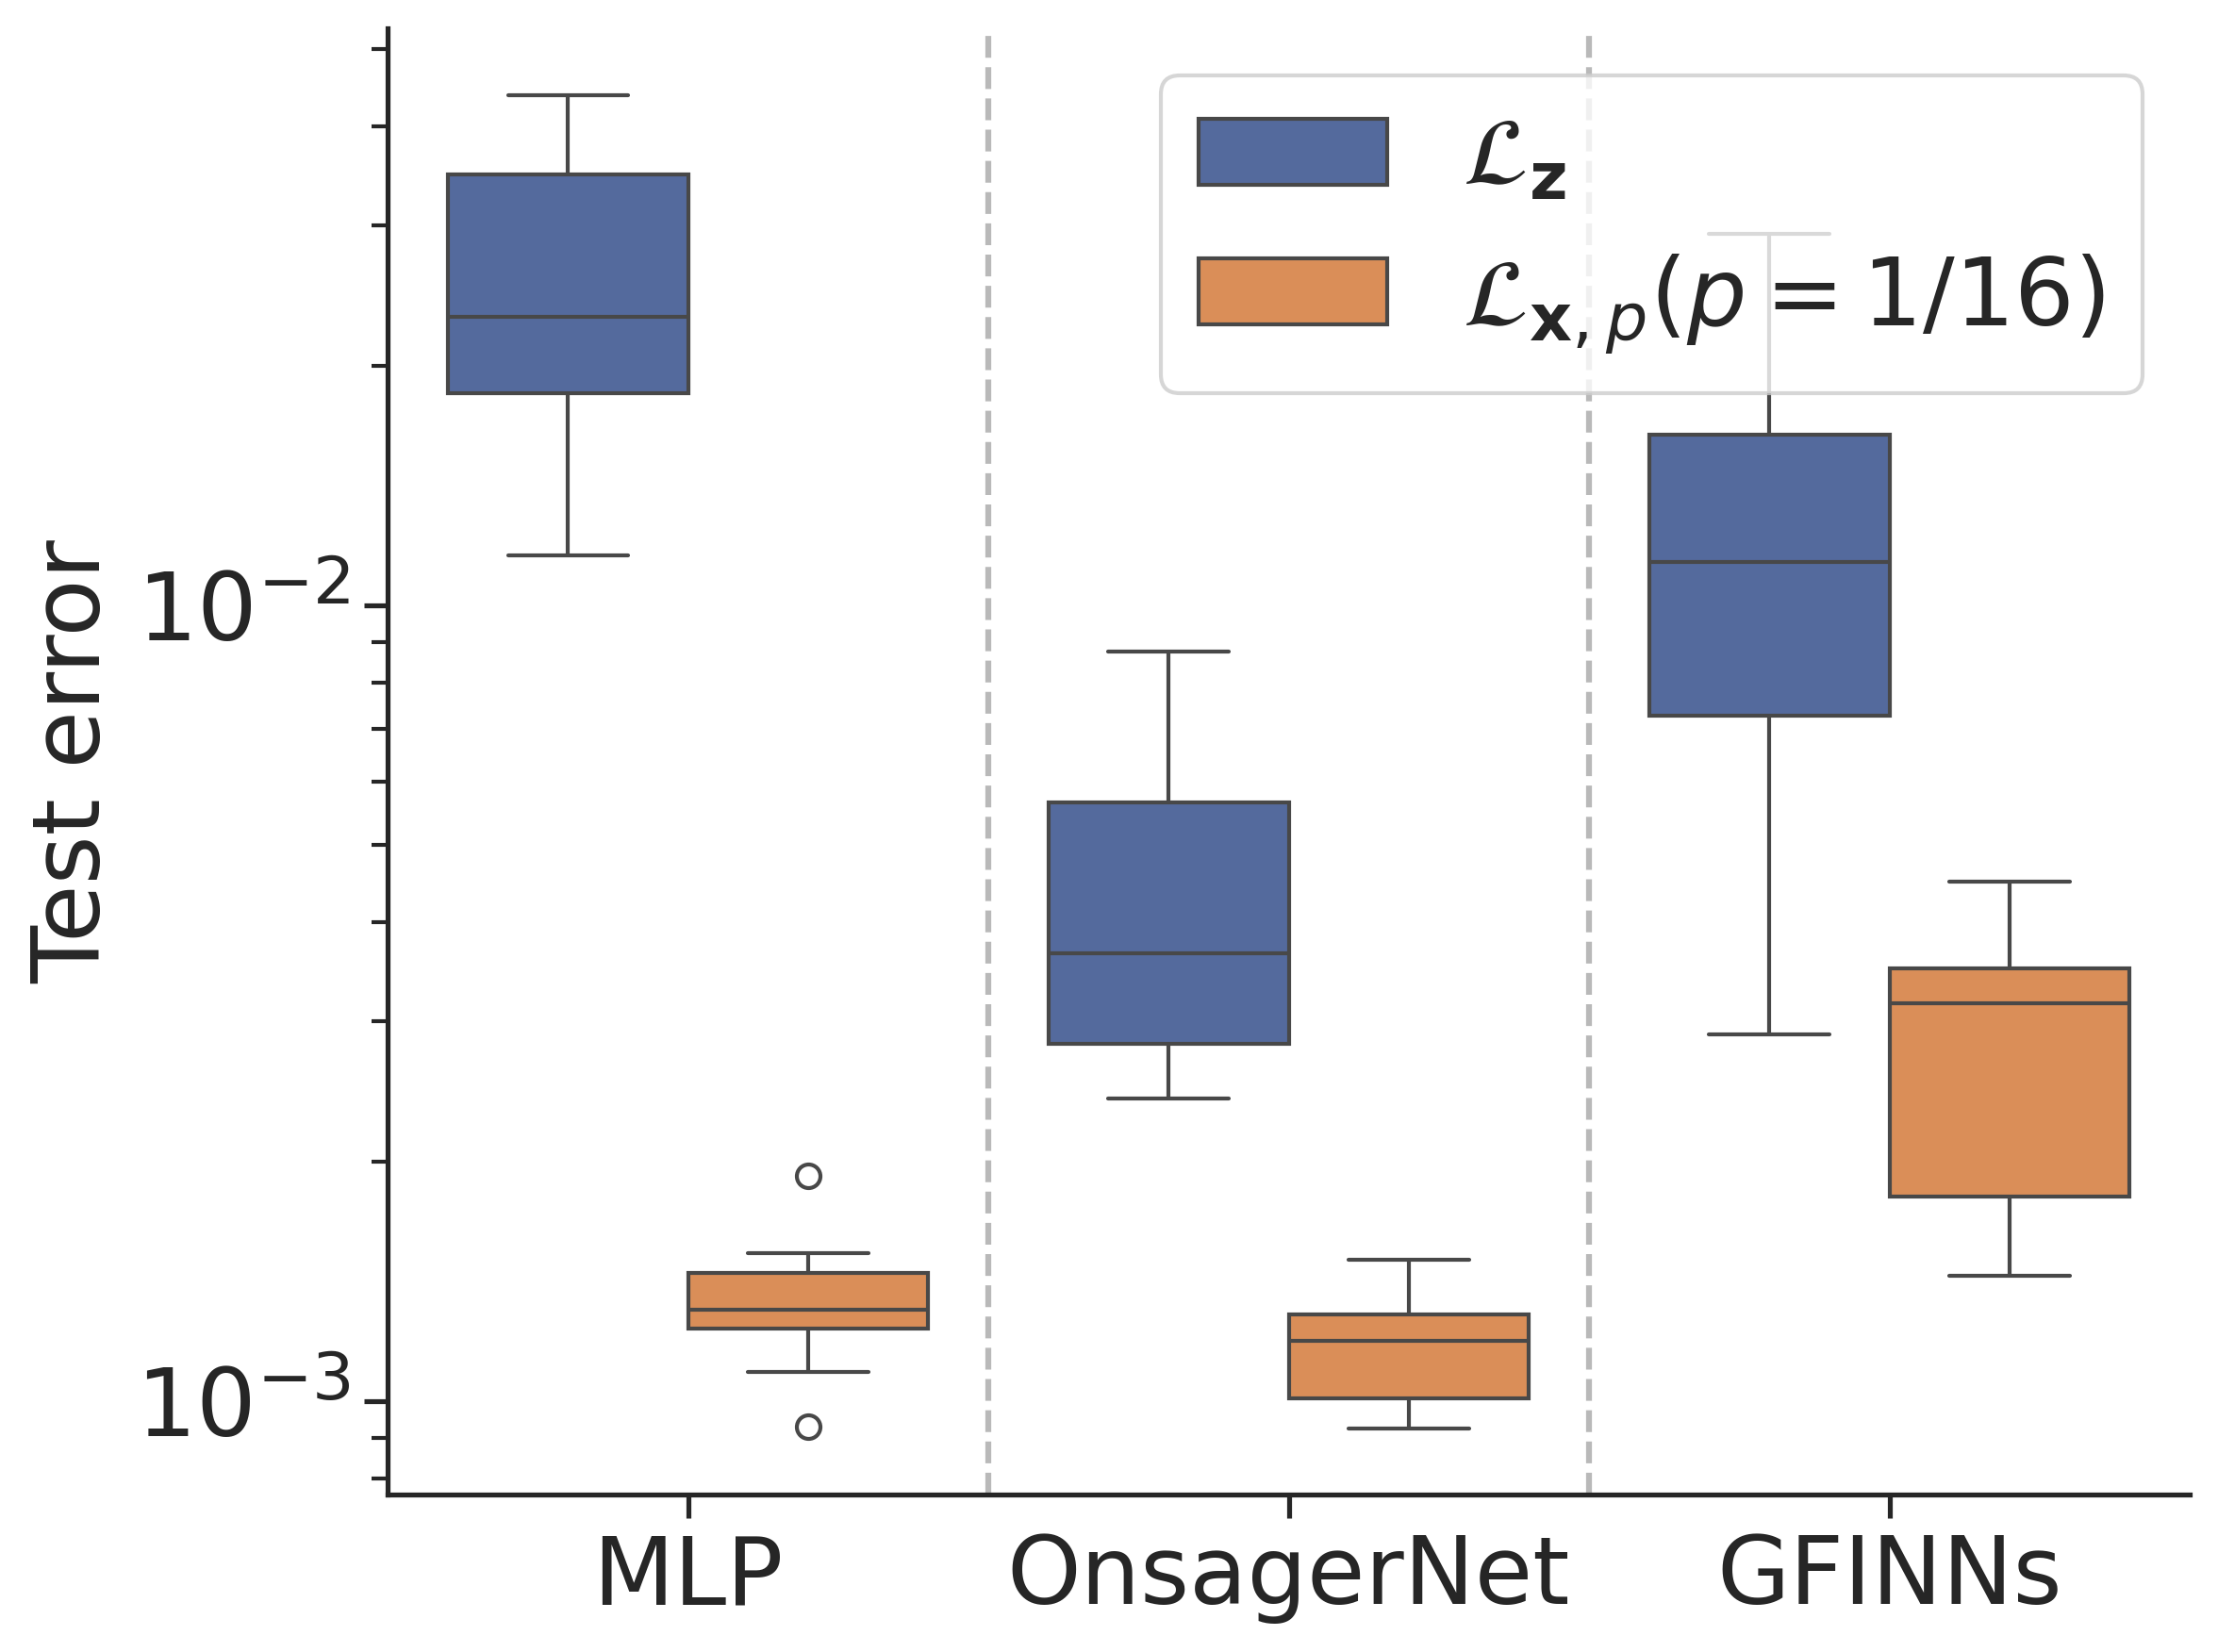

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme(style="darkgrid")

sns.set_theme(style="ticks")
fig = plt.figure(figsize=(8,6),dpi=300)
ax = fig.add_subplot(1, 1, 1)
plt.yscale('log')
sns.boxplot(x='model', y='results', data=data, hue='class', palette=["#4865A9", "#EF8A43"], 
            hue_order=['$\mathcal{L}_{\mathbf{z}}$', '$\mathcal{L}_{\mathbf{x},p}(p=1/16)$'] )
ax.set_xlabel('')
ax.set_ylabel('Test error',fontsize=24)

sns.despine()
ax.legend(loc='upper right', fontsize=24)
[plt.axvline(x, color = 'k', linestyle='--',alpha=0.3) for x in [1/2,3/2]]
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.savefig('img/structure.pdf')
plt.show()
